<a href="https://colab.research.google.com/github/A01793509/Equipo_44/blob/main/Avance1_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

---
##👣**Obtener Datos**: Cargamos el archivo CSV con la información del consumo del casino desde enero del 2021 hasta marzo del 2024.
---

In [ ]:
dfCasinoConsumo = pd.read_csv("DatosConsumoCasino.csv",sep=";")
dfCasinoConsumo.head()
dfCasinoConsumo.info()

,Consecutivo,IdProducto,cod lector,Cod comedor,Identificacion persona,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado,Nivel,Porcentaje apoyo,Invitado,Ing x planta
0,825979,2.0,0,1001,100001,2021-01-03 10:41,ALMUERZO,3486,Operativo,OPER,0,0,1
1,825980,2.0,0,1001,100002,2021-01-03 10:42,ALMUERZO,3486,Administrativo,ANAL,90,0,1
2,825981,2.0,0,1001,100003,2021-01-03 10:42,ALMUERZO,3486,Operativo,OPER,0,0,1
3,825982,2.0,1,1001,100004,2021-01-03 10:42,ALMUERZO,3486,Operativo,OPER,90,0,1
4,825983,2.0,0,1001,100005,2021-01-03 10:44,ALMUERZO,3486,Administrativo,OPER,0,0,1


In [ ]:
print("**********************************************")
print(f"Se encontraron {len(dfCasinoConsumo):,.2f} registros:")
print("**********************************************")

**********************************************
Se encontraron 884,615.00 registros:
**********************************************


---
###☝ Antes de iniciar con la limpieza, validamos la relevancia de cada columna para el modelo, clasificándola de acuerdo al tipo de dato y decidiendo la acción que realizaremos con estas en el dataframe. A continuación mostramos el análisis preliminar que hicimos para nuestros datos:
---


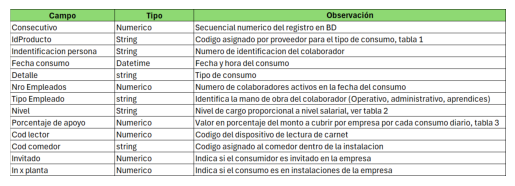

In [ ]:
img = mpimg.imread('DiccionarioDatos.png')
plt.imshow(img)
plt.axis('off')
plt.show()

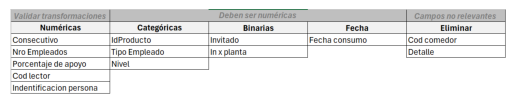

In [ ]:
img = mpimg.imread('AjusteDatos.png')
plt.imshow(img)
plt.axis('off')
plt.show()

---
##👣**Análisis exploratorio de datos:** Realizaremos análisis de las columnas existentes, validación de datos perdidos,imputación de acuerdo al tipo de dato de cada columna, reemplazo de datos, escalamiento de datos si se requiere y visualización a través de gráficas que nos permitan realizar un análisis de la distribución de los datos.
---

In [ ]:
#Verificamos si existen datos perdidos en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?")
if (dfCasinoConsumo.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?
Sí


Text(0, 0.5, 'Número de Registros')

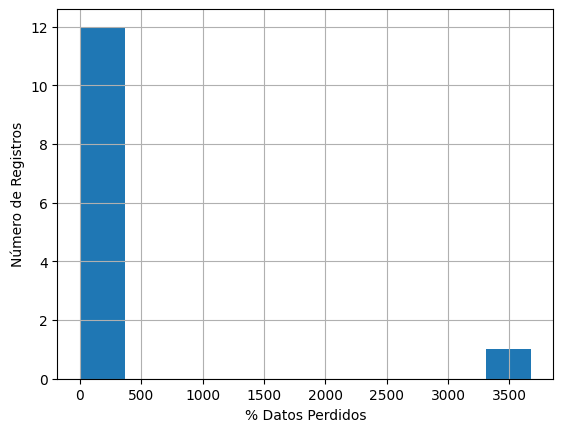

In [ ]:
#Graficamos con un histograma el porcentaje de datos perdidos según el número de registros
FilasNA = dfCasinoConsumo.isna().sum(axis=0) /len(dfCasinoConsumo.columns)
AS_FilasNA = FilasNA.hist()
AS_FilasNA.set_xlabel('% Datos Perdidos')
AS_FilasNA.set_ylabel('Número de Registros')

In [ ]:
#Validamos a continuación cuales son las columnas con datos perdidos para determinar el porce
ColumnasNA=dfCasinoConsumo.columns[dfCasinoConsumo.isna().any()].tolist()
print("*************************************************")
print("Las siguientes columnas presentan datos perdidos:")
print("*************************************************")
dfCasinoConsumo[ColumnasNA].dtypes

*************************************************
Las siguientes columnas presentan datos perdidos:
*************************************************


IdProducto    float64
dtype: object

In [ ]:
#Verificamos el porcentaje de datos perdidos por columna.
print("*******************************************************************")
print("El porcentaje de datos perdidos para las columnas identificadas es:")
print("*******************************************************************")
round(1-((dfCasinoConsumo[dfCasinoConsumo.columns[dfCasinoConsumo.isnull().any()]].count())/len(dfCasinoConsumo)),2)

*******************************************************************
El porcentaje de datos perdidos para las columnas identificadas es:
*******************************************************************


IdProducto    0.05
dtype: float64

---
#####🔎 Observamos que la única columna con datos perdidos es "**IdProducto**" presentando tan solo un **5%** de datos perdidos, por lo cual, concluímos que no es relevante para la integridad de la información. Sin embargo, al realizar un análisis más profundo a la información, encontramos que el campo "IdProducto" es una codificación que cada proveedor le asocia al tipo de consumo, valor que se categoriza en el campo "**Detalle**". En ese orden de ideas, procederemos a eliminar la columna "IdProducto" para trabajar con la columna "Detalle". Adicional a esta columna y a la columna "**Cod comedor**", encontramos que los campos "**Consecutivo**" y "**Cod lector**" no aportarían valor al conjunto de datos, ya que el primero es un autonumérico de los registros existentes y el segundo contiene un único valor para el conjunto de datos. Por lo anterior, serán eliminados y la tabla de campos a eliminar quedará de la siguiente manera:
---

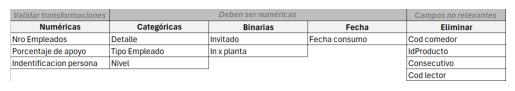

In [ ]:
img = mpimg.imread('AjusteDatosFinal.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#Procedemos a eliminar las columnas mencionadas anteriormente
dfCasinoConsumo.drop(columns=['Cod comedor', 'IdProducto','Consecutivo', 'cod lector'], axis=1, inplace=True)

In [ ]:
#Validamos las columnas con las que contamos en nuestro dataframe
print(dfCasinoConsumo.columns)

Index(['Identificacion persona', 'Fecha Consumo', 'Detalle', 'Nro empleados',
       'Tipo Empleado', 'Nivel', 'Porcentaje apoyo', 'Invitado',
       'Ing x planta'],
      dtype='object')


---
#####☝ A continuación vamos a obtener los valores no numéricos para aquellas columnas que según el diccionario deberían ser numéricas, tal como se identificó en el diccionario de datos mostrado al comienzo, una vez identificados estos valores no numéricos realizaremos su reemplazo antes de proceder con el cambio del tipo de dato en las columnas categóricas.
---

In [ ]:
#Creamos el dataframe "dfnum" solo con las columnas numéricas del conjunto de datos original.
ColumnasNumericas=['Identificacion persona', 'Nro empleados', 'Porcentaje apoyo', 'Invitado', 'Ing x planta']
dfnum = dfCasinoConsumo[ColumnasNumericas]
#Creamos una lista para almacenar todos los valores no numéricos que encontramos en las columnas numéricas
list_nn = list()
for col in range(len(dfnum)):
  for fil in dfnum.iloc[col]:
    tem=str(fil)
    if (tem.isnumeric()==False):
      #Asignamos el valor no numérico encontrado a la lista.
      list_nn.append(fil)

#Convertimos todos los valores de la lista a 'str'
list_nn_final=list(map(str,list_nn))
#Ordenamos la lista en forma descendente para obtener aquellos valores con caracteres no numéricos
list_nn_final.sort(reverse=True)
if(len(list_nn_final)>0):
  print("********************************************************************************************************")
  print("Las siguientes son ocurrencias por valor no numérico encontradas en columnas que deberían ser numéricas:")
  print("********************************************************************************************************")
  pd.DataFrame(list_nn_final).sort_values([0]).value_counts().head(15)
else:
  print("********************************************************************************************************")
  print("Todas las columnas numéricas poseen valores con el tipo de dato correcto.")
  print("********************************************************************************************************")


********************************************************************************************************
Todas las columnas numéricas poseen valores con el tipo de dato correcto.
********************************************************************************************************


In [ ]:
dfCasinoConsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884615 entries, 0 to 884614
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Identificacion persona  884615 non-null  int64 
 1   Fecha Consumo           884615 non-null  object
 2   Detalle                 884615 non-null  object
 3   Nro empleados           884615 non-null  int64 
 4   Tipo Empleado           884615 non-null  object
 5   Nivel                   884615 non-null  object
 6   Porcentaje apoyo        884615 non-null  int64 
 7   Invitado                884615 non-null  int64 
 8   Ing x planta            884615 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 60.7+ MB


---
#####☝ A continuación verificamos las columnas tipo "object", comenzando con la "**Fecha Consumo**", la idea es obtener los valores que no tengan formato fecha, una vez identificados estos valores inconsistentes procederemos a su estandarización.
---

In [ ]:
#Convertimos la columna 'Fecha Consumo' a tipo datetime
dfCasinoConsumo['Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Fecha Consumo'], errors='coerce')

#Obtenemos los valores que no se pudieron convertir a tipo datetime
valores_inconsistentes_datetime = dfCasinoConsumo[dfCasinoConsumo['Fecha Consumo'].isnull()]['Fecha Consumo']

# Verificar si todas las conversiones fueron exitosas
if dfCasinoConsumo['Fecha Consumo'].notnull().all():
  print("***********************************************************************")
  print("La columna 'Fecha Consumo' posee valores con el tipo de dato correcto.")
  print("***********************************************************************")
else:
  porc_inconsist_fecha = round((len(valores_inconsistentes_datetime)/len(dfCasinoConsumo))*100,2)
  print("****************************************************************************************************")
  print(f"La columna 'Fecha Consumo' contiene un %{porc_inconsist_fecha} de valores que no son de tipo fecha:")
  print(valores_inconsistentes_datetime)
  print("****************************************************************************************************")

****************************************************************************************************
La columna 'Fecha Consumo' contiene un %28.75 de valores que no son de tipo fecha:
502984   NaT
502985   NaT
502986   NaT
502987   NaT
502988   NaT
          ..
757347   NaT
757348   NaT
757349   NaT
757350   NaT
757351   NaT
Name: Fecha Consumo, Length: 254368, dtype: datetime64[ns]
****************************************************************************************************


---
#####🔎 Observamos que el **28.75%** (254,368) de los registros para el campo '**Fecha Consumo**' no presentan el tipo correcto, a continuación, realizaremos el ajuste de los datos inconsistentes.
---